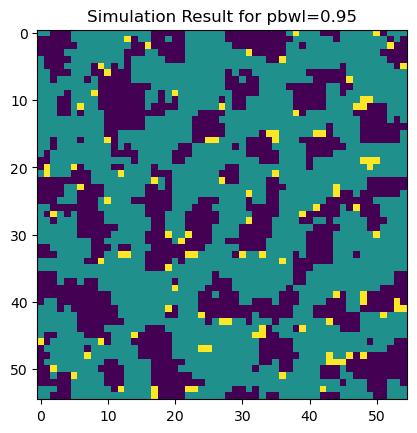

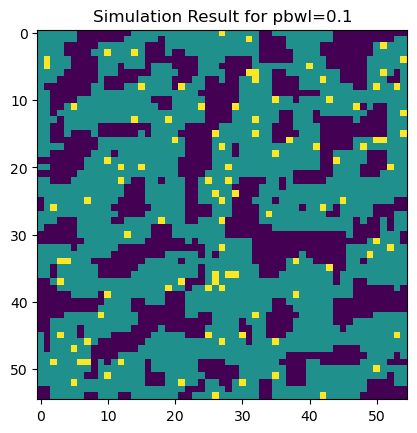

KeyboardInterrupt: 

In [2]:
from model import CA_rules, CA_grid
import analysis
import numpy as np
import matplotlib.pyplot as plt
import random
from analysis import calculate_attributes, count_neighbours, get_neighbours

### <font color = Pink > **Influence of Water-Solute and Solute-Solute Breaking Probabilities using 100 solute molecules** </font>

In [ ]:
pbl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
pbwl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
results = []

runs = 1

all_results_pblpbwl = {pbl: {} for pbl in pbl_values}
total_molecules = 2087 # 55x55x0.69

for pbl_value in pbl_values:
    for pbwl_value in pbwl_values:
        
        pbl_results = []
        pbwl_results = []

        for run in range(runs):
            print(f"Running simulation with {pbl_value} pbl value and {pbwl_value} pbwl value.")
            ca_grid = CA_grid(solute_amount=100)
            ca_rules = CA_rules(ca_grid, pbw=0.4, pbl=pbl_value, pbwl=pbwl_value, pbw_parameter=True, pbl_parameter=True, pbwl_parameter=False)

            final_grid = ca_rules.generate_simulation(pbw=0.4, pbl=pbl_value, pbwl=pbwl_value)

            count = count_neighbours(ca_grid.grid, ca_grid.height, ca_grid.width, cell_type=1)
            pbl_results.append(count)
            #plt.imshow(final_grid)
            #plt.show()

        pbl_results = np.array(pbl_results)
        print(pbl_results)

        average_results_pbl = np.mean(pbl_results, axis=0)
        std_dev_results_pbl = np.std(pbl_results, axis=0)

        all_results_pblpbwl[pbl_value][pbwl_value] = {
            'average': average_results_pbl,
            'std_dev': std_dev_results_pbl
        }

for pbl_value, data in all_results_pblpbwl.items():
    for pbwl_value, data in data.items():
        print(f"Pbw value: {pbl_value}")
        print(f"Pbwl value: {pbwl_value}")
        print(f"Average: {data['average']}")
        print(f"Standard Deviation: {data['std_dev']}")
        print()


In [ ]:
pbl_list = []
pbwl_list = []
average_list_pblpbwl = []

for pbl_value, data in all_results_pblpbwl.items():
    for pbwl_value, data in data.items():
        pbl = pbl_value
        pbwl = pbwl_value
        average_pblpbwl = data['average']
        
        pbl_list.append(pbl)
        pbwl_list.append(pbwl)
        average_list_pblpbwl.append(average_pblpbwl)

print("pbl_list:", pbl_list)
print("pbwl_list:", pbwl_list)
print("average_list_pblpbwl:", average_list_pblpbwl)

In [ ]:
# Extracting data for plotting
pbwl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
pbl_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize arrays to store data
avg_values = np.zeros((len(pbwl_values), len(pbl_values)))

# Populate the array with average values
for i, pbwl_value in enumerate(pbwl_values):
    for j, pbl_value in enumerate(pbl_values):
        avg_values[i, j] = all_results_pblpbwl[pbl_value][pbwl_value]['average']

# Creating a 2D plot
plt.figure(figsize=(10, 6))
for j, pbl_value in enumerate(pbl_values):
    plt.plot(pbwl_values, avg_values[:, j], label=f'$P_b(L)$ = {pbl_value}')

plt.xlabel('PBWL')
plt.ylabel('Average')
plt.title('2D Plot of Averages for Different $P_b(L)$ and $P_b(WL)$ Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Adjust the legend position
plt.grid(True)
plt.show()